In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
import seaborn as sns

In [164]:
#Reading ht csv file
df =pd.read_csv("C:\Projects\Data_sci\DAX-DS-Assignment-2022-Soham_Patil\Data_Analytics\healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [165]:
#Null Count
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [166]:
#Calculating Mean for Numerical values
val_num = df[['age','avg_glucose_level','bmi']].mean()
print(val_num)

age                   43.226614
avg_glucose_level    106.147677
bmi                   28.893237
dtype: float64


In [167]:
#Calculating Mean for all values
val = df.mean()
print(val)

id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     28.893237
stroke                   0.048728
dtype: float64


C:\Users\spatil\AppData\Local\Temp\ipykernel_21640\20209864.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  val = df.mean()


In [168]:
#Calculating Median
val_median = df[['age','avg_glucose_level','bmi']].median()
print(val_median)

age                  45.000
avg_glucose_level    91.885
bmi                  28.100
dtype: float64


In [169]:
val = df.median()
print(val)

id                   36932.000
age                     45.000
hypertension             0.000
heart_disease            0.000
avg_glucose_level       91.885
bmi                     28.100
stroke                   0.000
dtype: float64


C:\Users\spatil\AppData\Local\Temp\ipykernel_21640\24083124.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  val = df.median()


In [170]:
v = df.describe()
print(v)

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0

# Charts

C:\Projects\Data_sci\DAX-DS-Assignment-2022-Soham_Patil\myvenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='work_type', ylabel='count'>

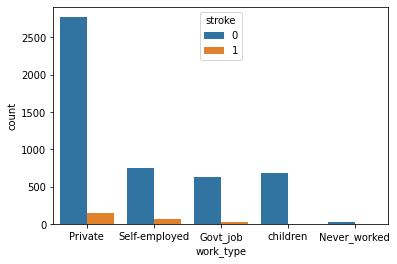

In [171]:
#People working in private are prone to getting a stroke as compared to others
sns.countplot(df['work_type'], hue = df['stroke'])

C:\Projects\Data_sci\DAX-DS-Assignment-2022-Soham_Patil\myvenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

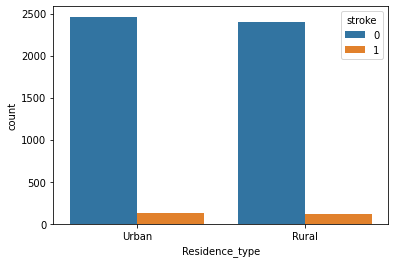

In [172]:
sns.countplot(df['Residence_type'], hue = df['stroke'])

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

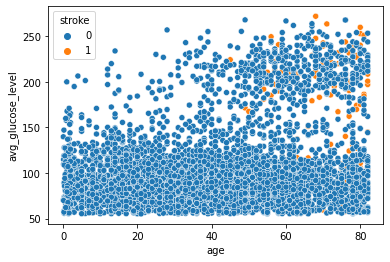

In [173]:
#We can infer that people having age higher than 40 are prone to getting a stroke, though we have equal proportion of blue spots
#we can also say that people having glucose level higher than 150 get a stroke and people having glucose level lower than 150 are healthy
sns.scatterplot(data = df,x='age', y='avg_glucose_level',hue = 'stroke')

# Percentage of null Values and filling Null Values

In [174]:
ISNULL = df.bmi.isnull()
ISNULL_SUM = ISNULL.sum()
print(ISNULL_SUM)

201


In [175]:
total_bmi = len(df.bmi)
print(total_bmi)

5110


In [176]:
percent_bmi = (ISNULL_SUM/total_bmi)*100
print(percent_bmi)

3.9334637964774952


In [177]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

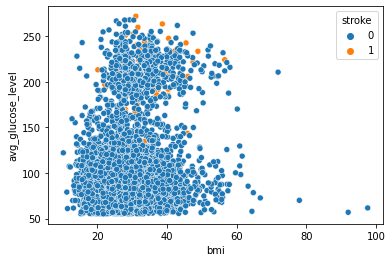

In [178]:
sns.scatterplot(data = df,x='bmi', y='avg_glucose_level',hue = 'stroke')

In [179]:
# min_threshold_bmi = df['bmi'].quantile(0.02)
# print(min_threshold_bmi)

# max_threshold_bmi = df['bmi'].quantile(0.95)
# print(max_threshold_bmi)

In [180]:
# df[df['bmi']>max_threshold_bmi]

In [181]:
upper_limit = df.bmi.mean() + 3*df.bmi.std()
print(upper_limit)

lower_limit = df.bmi.mean() - 3*df.bmi.std()
print(lower_limit)

51.96072218141144
5.7633482686864035


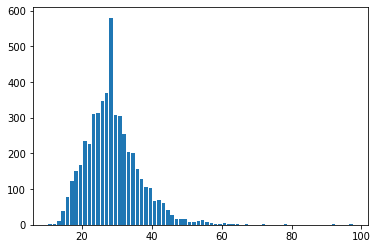

In [182]:
plt.hist(df.bmi,bins=70, rwidth=0.8)
plt.show()

In [183]:
df[(df.bmi>upper_limit) | (df.bmi<lower_limit)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
113,41069,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
258,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
270,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
333,1703,Female,52.0,0,0,Yes,Private,Urban,82.24,54.7,formerly smoked,0
358,66333,Male,52.0,0,0,Yes,Self-employed,Urban,78.40,64.8,never smoked,0
430,53144,Female,52.0,0,1,Yes,Private,Urban,72.79,54.7,never smoked,0
466,1307,Female,61.0,1,0,Yes,Private,Rural,170.05,60.2,smokes,0
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
637,3130,Female,56.0,0,0,Yes,Private,Rural,112.43,54.6,never smoked,0
662,23551,Male,28.0,0,0,Yes,Private,Urban,87.43,55.7,Unknown,0


In [184]:
#Removed the outliers from the bmi column
df_no_outlier_std_dev = df[(df.bmi<upper_limit) & (df.bmi>lower_limit)]
df_no_outlier_std_dev.shape

(5051, 12)

In [185]:
df['bmi'] = np.where(
    df['bmi']>upper_limit,
    upper_limit,
    np.where(
        df['bmi']<lower_limit,
        lower_limit,
        df['bmi']
    )
)

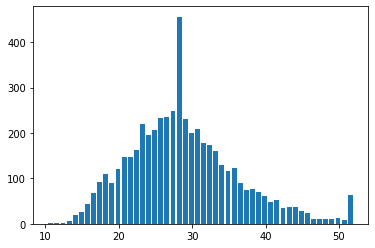

In [186]:
plt.hist(df.bmi,bins=50, rwidth=0.8)
plt.show()

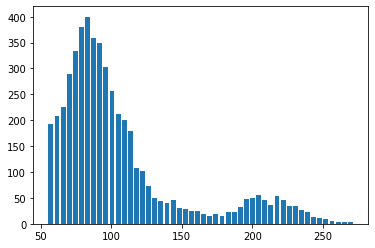

In [187]:
plt.hist(df.avg_glucose_level,bins=50, rwidth=0.8)
plt.show()

In [188]:
# #Using Z-Score
# df['zscore'] = (df.avg_glucose_level - df.avg_glucose_level.mean())/df.avg_glucose_level.std()
# df.head()

In [189]:
upper_limit_agl = df.avg_glucose_level.mean() + 3*df.avg_glucose_level.std()
lower_limit_agl = df.avg_glucose_level.mean() - 3*df.avg_glucose_level.std()

print(upper_limit_agl,lower_limit_agl)
# upper_limit_agl = df['zscore']>3
# lower_limit_agl = df['zscore']<-3

241.9983575554641 -29.70300334802772


In [190]:
# df[(df.zscore<-3) | (df.zscore>3)]

In [191]:
#Removed the outliers from the avg glucose level column using zScore

# df_no_outliers = df[(df.avg_glucose_level<upper_limit_agl) & (df.avg_glucose_level>lower_limit_agl)]
# df_no_outliers.shape
# df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]

In [192]:
# df['avg_glucose_level'] = np.where(
#     df['avg_glucose_level']<upper_limit_agl,
#     upper_limit_agl,
#     np.where(
#         df['avg_glucose_level']>lower_limit_agl,
#         lower_limit_agl,
#         df['avg_glucose_level']
#     )
# )

# Scaling

In [197]:
from sklearn.preprocessing import MinMaxScaler

In [210]:
Scaler = MinMaxScaler()

In [213]:
data = ['age','avg_glucose_level','bmi']

In [215]:
df[data] = Scaler.fit_transform(df[data])

In [219]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,0.816895,0,1,Yes,Private,Urban,0.801265,0.631290,formerly smoked,1
1,51676,Female,0.743652,0,0,Yes,Self-employed,Rural,0.679023,0.427261,never smoked,1
2,31112,Male,0.975586,0,1,Yes,Private,Rural,0.234512,0.532876,never smoked,1
3,60182,Female,0.597168,0,0,Yes,Private,Urban,0.536008,0.578483,smokes,1
4,1665,Female,0.963379,1,0,Yes,Self-employed,Rural,0.549349,0.328847,never smoked,1


# Encoding

# OnehotEncoding and dummyEncoding increases the columns whereas labelencoder does not increase the columns 

In [217]:
#OnehotEncoding and dummyEncoding increases the columns whereas labelencoder does not increase the columns  
from sklearn.preprocessing import LabelEncoder

In [218]:
lb = LabelEncoder()

In [220]:
Categorical_data = ['gender','ever_married','work_type','Residence_type','smoking_status']

In [225]:
# df[Categorical_data] = lb.fit_transform(df[Categorical_data])
df.gender = lb.fit_transform(df.gender)
df.ever_married = lb.fit_transform(df.ever_married)
df.work_type = lb.fit_transform(df.work_type)
df.Residence_type = lb.fit_transform(df.Residence_type)
df.smoking_status = lb.fit_transform(df.smoking_status)

In [226]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,0.816895,0,1,1,2,1,0.801265,0.631290,1,1
1,51676,0,0.743652,0,0,1,3,0,0.679023,0.427261,2,1
2,31112,1,0.975586,0,1,1,2,0,0.234512,0.532876,2,1
3,60182,0,0.597168,0,0,1,2,1,0.536008,0.578483,3,1
4,1665,0,0.963379,1,0,1,3,0,0.549349,0.328847,2,1



# Adding New Features Country And Working Hours

In [235]:
# df.insert(3,'Country',['India','Australia','Europe','USA'],True)
Country = ['India','Australia','Europe','USA']
# for i in range(len(df.id)):
    df['Country'] = pd.Series(Country)
df
Working_Hours = ['10','6','8','4','12']
df['working_Hours'] = pd.Series(Working_Hours)
# i= 0
#     while i <= range(len(df.id)):
#         df['Country'] = Country[i]
        

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Country,working_Hours
0,9046,1,0.816895,0,1,1,2,1,0.801265,0.631290,1,1,India,10
1,51676,0,0.743652,0,0,1,3,0,0.679023,0.427261,2,1,Australia,6
2,31112,1,0.975586,0,1,1,2,0,0.234512,0.532876,2,1,Europe,8
3,60182,0,0.597168,0,0,1,2,1,0.536008,0.578483,3,1,USA,4
4,1665,0,0.963379,1,0,1,3,0,0.549349,0.328847,2,1,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,0.975586,1,0,1,2,1,0.132167,0.427261,2,0,NaN,NaN
5106,44873,0,0.987793,0,0,1,3,1,0.323516,0.712902,2,0,NaN,NaN
5107,19723,0,0.426270,0,0,1,3,0,0.128658,0.487270,2,0,NaN,NaN
5108,37544,1,0.621582,0,0,1,2,0,0.513203,0.367252,1,0,NaN,NaN


In [234]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Country,working_Hours
0,9046,1,0.816895,0,1,1,2,1,0.801265,0.631290,1,1,India,10
1,51676,0,0.743652,0,0,1,3,0,0.679023,0.427261,2,1,Australia,6
2,31112,1,0.975586,0,1,1,2,0,0.234512,0.532876,2,1,Europe,8
3,60182,0,0.597168,0,0,1,2,1,0.536008,0.578483,3,1,USA,4
4,1665,0,0.963379,1,0,1,3,0,0.549349,0.328847,2,1,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,0.975586,1,0,1,2,1,0.132167,0.427261,2,0,NaN,NaN
5106,44873,0,0.987793,0,0,1,3,1,0.323516,0.712902,2,0,NaN,NaN
5107,19723,0,0.426270,0,0,1,3,0,0.128658,0.487270,2,0,NaN,NaN
5108,37544,1,0.621582,0,0,1,2,0,0.513203,0.367252,1,0,NaN,NaN


In [240]:
df.to_csv('AnalyticsCSV',index=False)

In [238]:
import os

In [239]:
os.getcwd()

'C:\\Projects\\Data_sci\\DAX-DS-Assignment-2022-Soham_Patil\\Data_Analytics'